# Dimensionality reduction on NBA player data

In [6]:
#Import Packages

import pandas as pd
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist as pdist
from scipy.spatial.distance import squareform as squareform

from matplotlib.pyplot import title as title
from mpl_toolkits.mplot3d import Axes3D as Axes3D
from matplotlib.pyplot import scatter as scatter
from matplotlib.pyplot import savefig as savefig

## Use the below for other matplotlib options
#%matplotlib inline
#%matplotlib qt
%matplotlib notebook

# 1. Load Data

In [37]:
dfload = pd.read_csv('data/stats.csv')
dfload = sort_columns_type(dfload)
dfload

,season,lg_id,pos,name,team_id,fga_per_poss,stl_per_poss,efg_pct,ts_pct,mp,...,pct_fga_00_03,ows,fga_per_g,gs,fta_per_fga_pct,fg2_per_poss,stl_per_g,pct_fga_16_xx,g,fg3_pct_corner
0,2011-12,NBA,PG,Kyrie Irving,CLE,25.2,1.8,0.517,0.566,1558,...,0.364,3.4,14.6,51,0.262,9.3,1.1,0.175,51,0.370
1,2012-13,NBA,PG,Kyrie Irving,CLE,27.2,2.3,0.503,0.553,2048,...,0.235,4.2,18.1,59,0.271,9.5,1.5,0.193,59,0.400
2,2013-14,NBA,PG,Kyrie Irving,CLE,25.6,2.2,0.480,0.533,2496,...,0.234,4.6,17.4,71,0.273,8.4,1.5,0.233,71,0.333
3,2014-15,NBA,PG,Kyrie Irving,CLE,23.5,2.2,0.532,0.583,2730,...,0.273,8.4,16.5,75,0.296,8.0,1.5,0.136,75,0.468
4,2015-16,NBA,PG,Kyrie Irving,CLE,27.1,1.7,0.496,0.540,1667,...,0.243,3.2,16.6,53,0.217,9.6,1.1,0.166,53,0.386
5,2016-17,NBA,PG,Kyrie Irving,CLE,29.3,1.0,0.505,0.542,310,...,0.228,0.7,20.4,9,0.179,9.1,0.7,0.196,9,0.375
6,Career,NBA,NaN,Kyrie Irving,NaN,25.7,2.0,0.505,0.555,10809,...,0.263,24.5,16.8,318,0.264,8.9,1.3,0.182,318,0.398
7,2004-05,NBA,SG,J.R. Smith,NOH,22.1,1.6,0.449,0.478,1859,...,0.245,-0.7,9.8,56,0.215,6.3,0.7,0.242,76,0.340
8,2005-06,NBA,SG,J.R. Smith,NOK,20.0,2.0,0.464,0.515,989,...,0.265,0.4,6.7,25,0.276,5.0,0.7,0.257,55,0.625
9,2006-07,NBA,SG,J.R. Smith,DEN,21.6,1.6,0.557,0.585,1471,...,0.228,2.5,10.2,24,0.196,4.5,0.8,0.104,63,0.319


#### (Queries are nice in pandas)

In [ ]:
# Joel Embiid?
df.query("name == 'Joel Embiid'")

# More than 1 block per game?
df.query("blk_per_g > 1");

# gs fewer than 50?
df.query("gs< 50");

nameframe = pd.DataFrame(df['name'])

# 2. Choosing which data to include in analysis

### Glossary for variables (columns)

In [36]:
glossary = pd.read_csv('data/glossary.csv', index_col=0)
rightway = glossary.T
glossary = rightway[(dfload.columns)]
glossary['g']

full_var_name                        Games
bballref_table                       Total
Off_or_Def                             NaN
FG_Ast_Rbd_Stl_Blk_Tov_Usg_or_Adv      NaN
pct_Avg_or_Absolute                    Abs
Name: g, dtype: object

### Choose Columns

In [60]:
#first take transpose of glossary
glossT = glossary.T
#Do queries on it to choose your attributes:


colframe = glossT.query("Off_or_Def == 'Offense'")
#a2 = a1.query("pct_Avg_or_Absolute == '%'")


# Take the Transpose again
colframe = colframe.T
#Get just the columns as a "series" from this dataframe
cols = colframe.columns
# Since these don't look all that illuminating without names, let us get the bio columns!
biovars = (glossT.query("bballref_table == 'Bio'")).T.columns
#Append the cols you want to biovars
cols = biovars.append(cols)
#remove more columns, like age, dunks made, etc.
cols = cols.delete(5).delete(13).delete(16).delete(60).delete(16)
cols;
#the columns of the glossary sub-section are now your variables!  Use to pick out the specific columns from your data frame.

## Apply trimming to the data frame

### First trim the rows

In [66]:
#deep copy the data we loaded
df = dfload.copy()
df.shape

#trim rows
#only players with more than 100 games.  This means only "career" rows, and no rookies.
#df = df.query("season == 'Career'")
df = df.query("g> 100")
df.shape

(301, 90)

### Now trim the columns

In [67]:
df = df[cols]
df.shape

(301, 59)

### How to deal with missing values?  Should probably be decided by category

In [69]:
#finding the number of NaN values in each column
df.isnull().sum()

#Use the fact that NaN is not equal to itself! Brilliant.
df.query("pos != pos");

#Finally have our trimmed frame!
df = df.fillna(float(0))

### code below to be organized

In [14]:
a = ((df.query("name == 'Stephen Curry'").values.tolist())[0])[5:]

print ''

b = ((df.query("name == 'Dwight Howard'").values.tolist())[0])[5:]

com = np.ones((len(b), 2))

com[:, 0] = a
com[:, 1] = b
np.set_printoptions(suppress=True)
com;

## Plots of data after pre-processing (dimensionality reduction)

<IPython.core.display.Javascript object>


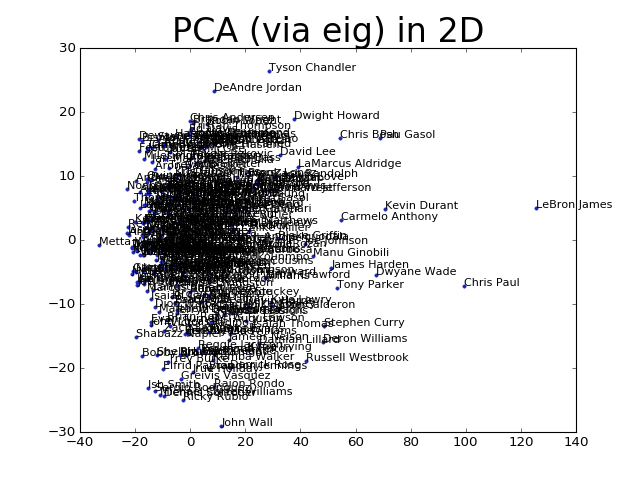

In [74]:
c1, c2, c3, names = plot_dim_redux(df, 'PCA', 'eig', text=True, specrows = False, a = 21, b = 35, threeD = False)

In [84]:
pcadata = pd.DataFrame([names,c1,c2,c3]).T
pcadata.to_csv("tocsv6581.csv")

In [18]:
plot_dim_redux(df, 'PCA', 'svd', text=True, threeD = False)

In [437]:
plot_dim_redux(df, 'MDS', 'eig', threeD = False)

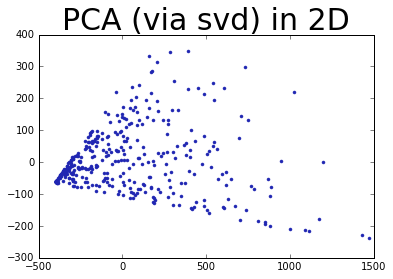

In [111]:
plot_dim_redux(df, 'PCA', 'svd', threeD = False)

In [48]:
plot_dim_redux(df, 'PCA', 'eig', threeD = False)

In [439]:
plot_dim_redux(df, 'PCA', 'svd', threeD = True)

<IPython.core.display.Javascript object>


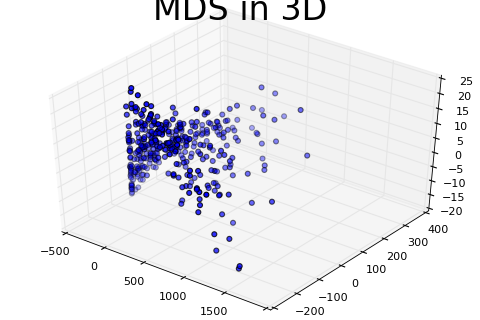

In [190]:
plot_dim_redux(df, 'MDS', 'eig', threeD = True)

# --------All of the functions--------

## Pandas helper functions

In [85]:
'''prints out all of the something in the data frame that are zero?'''
def is_zero(df):
    a = df
    b = []
    for i in df.columns:
        lit = i + " == 0.0"
        b.append((i, a.query(lit)))
    #print out list  
    for j in b:
        print (j[0], (j[1].shape)[0])

#### [pandas <----> numpy] functions 

''' For the following functions, "df" is a pandas data frame.
    Function "return_data_mat" turns the data frame into numpy array with player name column removed.
    Function "return_names" returns the names column of the players.'''

def return_data_mat(df):
    vals = df.values
    trimvals = delete_nonquant_cols(vals)
    data_mat = trimvals.astype(float)
    return data_mat

def return_names(df):
    names = np.array(df['name']).astype(str)
    return names

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

#### pandas functions

def sort_columns_type(df):
   
    #get idx for string columns
    vals = df.values
    idx = get_idx_str_cols(vals)
    
    #get column list and sort it    
    cols = (df.columns).tolist()
    str_cols = [cols[i] for i in idx]
 
    for x in str_cols:
        cols.remove(x)
    cols = str_cols + cols
    
    # sort new data frame based on new column ordering
    newdf = df[cols]
    return newdf

def get_idx_str_cols(arr):
    
    #get indicies of non-quantitative columns
    idxlist = []
    m, n = arr.shape
    for i in range(m):
        for j in range(n):
            if (type(arr[i,j]) == str):
                idxlist.append(j)
    idxset = set(idxlist)
    idx = list(idxset)
    idx.sort()
    return idx

def delete_nonquant_cols(arr):
    
    m, n = arr.shape
    idx = get_idx_str_cols(arr)
        
    #create a mask with a "False" for each column not desired       
    mask = np.ones(n, dtype=bool)
    mask[idx] = False
    
    #index through arr with the mask
    result = arr[:,mask]
    
    #testing that only numbers remain
    a, b = result.shape
    for i in range(a):
        for j in range(b):
            g = type(result[i,j])
            assert (g is float or g is long or g is int or g is complex) 
    
    return result

 ## Plotting function

In [26]:
# Plotting function

'''Note that documentation should be added on the parameters:
        data_frame: the input
            method: PCA or MDS
         procedure: svd or eigendecomposition
         
         (optional parameters)
          specrows: only plotting specific rows. boolean True/False. done after query. see lebron example.
                 a: the row where specrows start.
                 b: the row where specrows end.
              text: add player name text? True/False
            threeD: plot in three dimensions? True/False.
'''

def plot_dim_redux(data_frame, method, procedure, specrows = False, a = 0, b = 0, text = False, threeD = False):
    
    #Get the data matrix
    data = return_data_mat(data_frame)
    
    #Get new data based off of Dimensionality reduction method
    if method == 'PCA':
        new_data = PCA(data, procedure)
        
    if method == 'MDS':
        new_data = MDS(data, procedure)
        
    #Get data columns and the names column
    new_data = new_data.A
    col1 = new_data[:, 0]
    col2 = new_data[:, 1]
    col3 = new_data[:, 2]
    names = return_names(data_frame)
    
    if specrows == True:
        col1 = col1[a:b]
        col2 = col2[a:b]
        col3 = col3[a:b]
        names = names[a:b]
    
#     print type(col1), type(col2), type(col3)
    
    #2D Plot
    if threeD == False:
        clr1 =  '#2026B2'
        fig = plt.figure()
        ax1 = fig.add_subplot(111)
        ax1.plot(col1, col2, '.', mfc=clr1, mec=clr1)
        #Use Players names in the plot
        if text == True:
            for i in range(len(col1)):
                plt.text(col1[i], col2[i], names[i], fontsize=10)
        title(method + ' (via ' + str(procedure) + ')' + ' in 2D', fontsize=30)
        plt.show()
   
    #3D Plot    
    elif threeD == True:
        ax = Axes3D(plt.figure())
        ax.scatter(col1, col2, col3, s=20, cmap='jet')
        title(method + ' in 3D', fontsize=30)
        plt.show()  
    
    return col1, col2, col3, names

## PCA/MDS Helper functions

In [3]:
# # HELPER FUNCTIONS

def flip(X, col_number):
    ''' X is an array with two axes.
        flips all values in a given column
        remember columns are 0-indexed'''
    for i in range(X.shape[0]): #for every row
        X[i, col_number] = - (X[i, col_number]) #flip value
    return X 

def get_distance_matrix(X):
    D = squareform(pdist(X, 'euclidean'))
    return D

def test_PCA(data, new_dims=2):
    '''
    test by attempting to recover original data array from
    the eigenvectors of its covariance matrix & comparing that
    'recovered' array with the original data
    '''
    _ , F = PCA(data, 'eig')
    X = PCA(data, 'svd')
    data_recovered = np.matrix(X) * F
    data_recovered += data_recovered.mean(axis=0)
    assert np.allclose(data, data_recovered)

## PCA function

In [4]:
# # PCA function
    
def PCA(data, procedure, new_dims=4):
    """
    returns: X: data transformed (projected to principal component axes)
    pass in: 
        data as 2D NumPy array. data points are rows. variables are columns.
        procedure. either svd or eigendecomposition.
        new_dims (optional). size out output matrix. number of dims in rescale.
    """
    #data matrix and shape
    data = np.matrix(data)
    m, n = data.shape
    
    #centering matrix z  
    z = np.matrix(np.zeros((m, n)))
    colmeans = data.mean(axis=0)
    for i in range(m):
        z[i, :] = colmeans    
        
    #mean centered        
    data_c = data - z
        
    if (procedure == 'svd'):
    
        # # BELOW: SVD method    
        # # get u and svals
        u, svals, v = linalg.svd(data_c, full_matrices = False) # run an svd on (should it be centered?) data
        
        #handle sign ambiguity in SVD
        for i in range(len(svals)):
            svals[i] = abs(svals[i])
            
        # sort s and u in decreasing order
        idx_ascending = np.argsort(svals)
        idx = idx_ascending[::-1]
        svals = svals[idx]
        u = u[:,idx]  
        
        #trim to new dimension size
        svals = svals[0:new_dims] #trim s values
        s = np.diag(svals)  # make s matrix
        u = u[:, 0:new_dims] # trim u values

        # create score matrix X = US and return it
        X = np.matrix(u) * np.matrix(s)
        return X
    
    if (procedure == 'eig'):
    
        ## BELOW: eigendecomposition method.    
        
        # calculate the covariance matrix
        R = (1/float(m)) * ((np.matrix(data_c)).T * np.matrix(data_c))
        
        #R =np.cov(data, rowvar=False)

        # calculate eigenvectors & eigenvalues of the covariance matrix
        evals, evecs = linalg.eigh(R)   # use 'eigh' rather than 'eig' since R is symmetric 

        # sort eigenvalues/eigenvectors in decreasing order
        idx_ascending = np.argsort(evals)
        idx = idx_ascending[::-1]
        evals = evals[idx]
        evecs = evecs[:,idx]

        # select the first n eigenvectors (n is desired dimension of rescaled data)
        transform_evecs = evecs[:, :new_dims]

        # carry out the transformation on the data using eigenvectors matrix
        X = np.matrix(data_c) * np.matrix(transform_evecs)
        
        X = flip(X,0)
        X = flip(X,1)
 
        return X #, np.matrix(transform_evecs) 
    
### These functions assisted by this link:
# http://stackoverflow.com/questions/13224362/principal-component-analysis-pca-in-python

## MDS Function

In [5]:
# # MDS function
    
def MDS(data, procedure, new_dims = 4):
    
    """
    returns: X: data transformed
    pass in: 
        data as 2D NumPy array. data points are rows. variables are columns.
        procedure. either svd or eigendecomposition, for gram matrix B.
        new_dims (optional). size out output matrix. number of dims in rescale.
    """
    
    # # get squared proximity matrix
    D = get_distance_matrix(data)
    D2 = np.power(D, 2)
    n = D2.shape[0]
    
    # # create centering matrix
    I = np.eye(n) # identity matrix
    my_ones = np.ones((n,n)) # matrix of all ones
    my_ones = (float(1) / float(n)) * my_ones # divided by n
    C = I - my_ones # C is centering matrix
    
    # # apply double centering to get inner product matrix
    B = (float(-1) / float(2)) * np.matrix(C) * np.matrix(D2) * np.matrix(C)
    
    if (procedure == 'svd'):
    
        # # BELOW: SVD method    
        # # get u and svals
        u, svals, v = linalg.svd(B, full_matrices = False) # run an svd on (should it be centered?) data

        #handle sign ambiguity in SVD
        for i in range(len(svals)):
            svals[i] = abs(svals[i])

        # sort s and u in decreasing order
        idx_ascending = np.argsort(svals)
        idx = idx_ascending[::-1]
        svals = svals[idx]
        u = u[:,idx]  

        #trim to new dimension size
        svals = svals[0:new_dims] #trim s values
        s = np.diag(svals)  # make s matrix
        s = np.power(s, .5)  #take square root
        u = u[:, 0:new_dims] # trim u values


        # create score matrix X = US and return it
        X = np.matrix(u) * np.matrix(s)

        X = flip(X,0)
        X = flip(X,1)
    

    if (procedure == 'eig'):

        ## BELOW: eigendecomposition method.    
        # calculate eigenvectors & eigenvalues of the gram matrix B
        evals, evecs = linalg.eigh(B)   # use 'eigh' rather than 'eig' since R is symmetric 

        # sort eigenvalues/eigenvectors in decreasing order
        idx_ascending = np.argsort(evals)
        idx = idx_ascending[::-1]
        evals = evals[idx]
        evecs = evecs[:,idx]
        
        #trim to new dimension size
        evals = evals[0:new_dims] #trim  eigenvalues
        ediag = np.diag(evals)  # make eigendiag matrix
        s = np.power(ediag, .5)  #take square root to get s
        u = evecs[:, 0:new_dims] # trim evecs to get the u desired


        # create score matrix X = US and return it
        X = np.matrix(u) * np.matrix(s)

        #this section below helps to be same as PCA in 2D. Not sure if necessary yet.
        X = flip(X,0)
        X = flip(X,1)
           
#     #this part handles negatives I think?
#     for i in range(new_X.shape[1]):
#         if new_X[0,i] < 0:
#             for j in range(new_X.shape[0]):
#                 new_X[j, i] = -new_X[j, i]
                
    
    #return value
    return X 